In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# plotly
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import math 
import calendar

In [2]:
os.chdir('C:\\Users\\pedne\\Python\\Competition\\swiss')

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample_submission  = pd.read_csv('sample_submission.csv')

In [4]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))
print('There are {} rows and {} columns in sample_submission'.format(sample_submission.shape[0],sample_submission.shape[1]))

There are 478741 rows and 27 columns in train
There are 121259 rows and 27 columns in test
There are 49772 rows and 2 columns in sample_submission


In [5]:
#Removes train rows which has Local_Authority_(Highway) not present in test set
#test_user_id_list=test['Local_Authority_(Highway)'].tolist()
#train=train[train['Local_Authority_(Highway)'].isin(test_user_id_list)]

In [6]:
#Check unique values of each column
'''for i in train.columns.drop(['Accident_ID','Date','Time']):
    print(i,np.sort(train[i].unique()))'''

"for i in train.columns.drop(['Accident_ID','Date','Time']):\n    print(i,np.sort(train[i].unique()))"

In [7]:
#Handle null values
#train.dropna(axis=0,inplace=True)
#test.Time.fillna(method='ffill',inplace=True)

#train["Time"]=train["Time"].fillna(train["Time"].mode()[0])
train["Time"]=train["Time"].fillna("00:00")

train["Road_Surface_Conditions"]=train["Road_Surface_Conditions"].fillna(train["Road_Surface_Conditions"].mode()[0])
train["Special_Conditions_at_Site"]=train["Special_Conditions_at_Site"].fillna(train["Special_Conditions_at_Site"].mode()[0])

#test["Time"]=test["Time"].fillna(test["Time"].mode()[0])
test["Time"]=test["Time"].fillna("00:00")
test["Road_Surface_Conditions"]=test["Road_Surface_Conditions"].fillna(test["Road_Surface_Conditions"].mode()[0])
test["Special_Conditions_at_Site"]=test["Special_Conditions_at_Site"].fillna(test["Special_Conditions_at_Site"].mode()[0])

In [8]:
#Convert to datetime
train['Date'] = train['Date'] + " " + train['Time']
train['Date'] =  pd.to_datetime(train['Date'], format='%d/%m/%y %H:%M')

test['Date'] = test['Date'] + " " + test['Time']
test['Date'] =  pd.to_datetime(test['Date'], format='%d/%m/%y %H:%M')

#train
train["day_in_month"]=train.Date.dt.day
train["month_in_year"]=train.Date.dt.month
train["year"]=train.Date.dt.year
train["hour"] = train["Date"].dt.hour
train['dayofweek'] = train['Date'].dt.dayofweek
train['Minute']=train['hour']*60.0+train["Date"].dt.minute
train['WeekofYear'] = train['Date'].apply(lambda x : x.weekofyear)

#test
test["day_in_month"]=test.Date.dt.day
test["month_in_year"]=test.Date.dt.month
test["year"]=test.Date.dt.year
test["hour"] = test["Date"].dt.hour
test['dayofweek'] = test['Date'].dt.dayofweek
test['Minute']=test['hour']*60.0+test["Date"].dt.minute
test['WeekofYear'] = test['Date'].apply(lambda x : x.weekofyear)


df1=test.copy()

train.head(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear
0,1,34,2,1,2012-12-19 13:20:00,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13,2,800.0,51
1,2,5,2,1,2012-11-02 07:53:00,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,7,4,473.0,44
2,3,1,2,1,2012-11-02 16:00:00,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16,4,960.0,44


In [9]:
### Try New starts ###

In [10]:
train["Number_of_Casualties"].value_counts()

1    329124
2     98814
3     35399
4      9318
5      6086
Name: Number_of_Casualties, dtype: int64

In [11]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 478741 rows and 34 columns in train
There are 121259 rows and 34 columns in test


In [12]:
train['train_or_test']='train'
test['train_or_test']='test'

df=pd.concat([train,test])

print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (600000, 35): 


In [13]:
df["maximum_hours"] = df["hour"].isin([8, 12,13,14,15,16,17,18]).astype("object")

In [14]:
# frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

In [15]:
print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (600000, 37): 


In [16]:
import category_encoders as ce
#postcode
cat_features = ['postcode']

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
df['postcode_cnt'] = count_enc.fit_transform(df[cat_features])

#Local_Authority_(Highway)
cat_features_1 = ['Local_Authority_(Highway)']

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
df['LAH_cnt'] = count_enc.fit_transform(df[cat_features_1])

#Local_Authority_(District)	
cat_features_2 = ['Local_Authority_(District)']

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
df['LAD_cnt'] = count_enc.fit_transform(df[cat_features_2])

#Police_Force
cat_features_3 = ['Police_Force']

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
df['PF_cnt'] = count_enc.fit_transform(df[cat_features_3])

In [17]:
print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (600000, 41): 


In [18]:
df.sample(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear,train_or_test,maximum_hours,Minute_Freq,postcode_cnt,LAH_cnt,LAD_cnt,PF_cnt
93105,460618,1,2,0,2013-01-15 00:20:00,2,0:20,23,E06000026,3,4,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining with high winds,Dry,None,None,1,Yes,England,BH11 9AA,United Kingdom,15,1,2013,0,1,20.0,3,test,False,0.650657,8,2428,23,1
352421,441655,96,1,2,2012-05-17 13:45:00,2,13:45,933,S12000041,6,4,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,Alba / Scotland,SE4 1EE,United Kingdom,17,5,2012,13,3,825.0,20,train,True,1.976966,9,1166,933,96
454839,570095,94,2,3,2012-05-25 16:59:00,2,16:59,922,E06000055,4,9,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,Alba / Scotland,IP25 6AD,United Kingdom,25,5,2012,16,4,1019.0,21,train,True,0.352346,20,3652,922,94


In [19]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'
    
df['Type_of_Day']=df['hour'].apply(lambda x: time_of_day(x))

In [20]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

df['Season'] = df['month_in_year'].apply(month2seasons)
df.head(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear,train_or_test,maximum_hours,Minute_Freq,postcode_cnt,LAH_cnt,LAD_cnt,PF_cnt,Type_of_Day,Season
0,1,34,2,1,2012-12-19 13:20:00,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13,2,800.0,51,train,True,2.638429,7,18011,344,34,Afternoon,Summer
1,2,5,2,1,2012-11-02 07:53:00,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,7,4,473.0,44,train,False,0.430223,12,2681,102,5,Early Morning,Spring
2,3,1,2,1,2012-11-02 16:00:00,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16,4,960.0,44,train,True,3.002112,14,33979,531,1,Afternoon,Spring


In [21]:
# Feature Eng starts

In [22]:
from itertools import combinations
from sklearn.preprocessing import LabelEncoder

def frequency_encoding(column_name,output_column_name,df):
    fe_pol = (df.groupby(column_name).size()) / len(df)
    df[output_column_name] = df[column_name].apply(lambda x : fe_pol[x])

le = LabelEncoder()
le_features=[]
cat_features=[]

columns=['Police_Force','1st_Road_Class','1st_Road_Number','2nd_Road_Class','Speed_limit','Local_Authority_(District)','Local_Authority_(Highway)','Number_of_Vehicles','Urban_or_Rural_Area','Road_Type']


comb = combinations(columns, 2) 

for i in list(comb):  
    df[f'{i[0]}_{i[1]}']=df[i[0]].astype(str)+'_'+df[i[1]].astype(str)
    df[f'{i[0]}_{i[1]}_le']=le.fit_transform(df[f'{i[0]}_{i[1]}'])
    frequency_encoding(f'{i[0]}_{i[1]}',f'{i[0]}_{i[1]}',df)
    cat_features.append(f'{i[0]}_{i[1]}')  

frequency_encoding('1st_Road_Class','1st_Road_Class_fe',df)
frequency_encoding('1st_Road_Number','1st_Road_Number_fe',df)
frequency_encoding('2nd_Road_Class','2nd_Road_Class_fe',df)
frequency_encoding('Speed_limit','Speed_limit_fe',df)
frequency_encoding('Urban_or_Rural_Area','Urban_or_Rural_Area_fe',df)
frequency_encoding('Number_of_Vehicles','Number_of_Vehicles_fe',df)
frequency_encoding('Road_Type','Road_Type_fe',df)

'''Road_Type_aggregate_features = df.groupby(['Road_Type']).agg({'Speed_limit': ['mean', 'sum'],
                                                      
                                                     })
Road_Type_aggregate_features.columns = ['Road_Type_aggregate_features' + '_'.join(c).strip('_') for c in Road_Type_aggregate_features.columns]
df = pd.merge(df, Road_Type_aggregate_features, on = ['Road_Type'], how='left')'''

"Road_Type_aggregate_features = df.groupby(['Road_Type']).agg({'Speed_limit': ['mean', 'sum'],\n                                                      \n                                                     })\nRoad_Type_aggregate_features.columns = ['Road_Type_aggregate_features' + '_'.join(c).strip('_') for c in Road_Type_aggregate_features.columns]\ndf = pd.merge(df, Road_Type_aggregate_features, on = ['Road_Type'], how='left')"

In [23]:
df.sample(15)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear,train_or_test,maximum_hours,Minute_Freq,postcode_cnt,LAH_cnt,LAD_cnt,PF_cnt,Type_of_Day,Season,Police_Force_1st_Road_Class,Police_Force_1st_Road_Class_le,Police_Force_1st_Road_Number,Police_Force_1st_Road_Number_le,Police_Force_2nd_Road_Class,Police_Force_2nd_Road_Class_le,Police_Force_Speed_limit,Police_Force_Speed_limit_le,Police_Force_Local_Authority_(District),Police_Force_Local_Authority_(District)_le,Police_Force_Local_Authority_(Highway),Police_Force_Local_Authority_(Highway)_le,Police_Force_Number_of_Vehicles,Police_Force_Number_of_Vehicles_le,Police_Force_Urban_or_Rural_Area,Police_Force_Urban_or_Rural_Area_le,Police_Force_Road_Type,Police_Force_Road_Type_le,1st_Road_Class_1st_Road_Number,1st_Road_Class_1st_Road_Number_le,1st_Road_Class_2nd_Road_Class,1st_Road_Class_2nd_Road_Class_le,1st_Road_Class_Speed_limit,1st_Road_Class_Speed_limit_le,1st_Road_Class_Local_Authority_(District),1st_Road_Class_Local_Authority_(District)_le,1st_Road_Class_Local_Authority_(Highway),1st_Road_Class_Local_Authority_(Highway)_le,1st_Road_Class_Number_of_Vehicles,1st_Road_Class_Number_of_Vehicles_le,1st_Road_Class_Urban_or_Rural_Area,1st_Road_Class_Urban_or_Rural_Area_le,1st_Road_Class_Road_Type,1st_Road_Class_Road_Type_le,1st_Road_Number_2nd_Road_Class,1st_Road_Number_2nd_Road_Class_le,1st_Road_Number_Speed_limit,1st_Road_Number_Speed_limit_le,1st_Road_Number_Local_Authority_(District),1st_Road_Number_Local_Authority_(District)_le,1st_Road_Number_Local_Authority_(Highway),1st_Road_Number_Local_Authority_(Highway)_le,1st_Road_Number_Number_of_Vehicles,1st_Road_Number_Number_of_Vehicles_le,1st_Road_Number_Urban_or_Rural_Area,1st_Road_Number_Urban_or_Rural_Area_le,1st_Road_Number_Road_Type,1st_Road_Number_Road_Type_le,2nd_Road_Class_Speed_limit,2nd_Road_Class_Speed_limit_le,2nd_Road_Class_Local_Authority_(District),2nd_Road_Class_Local_Authority_(District)_le,2nd_Road_Class_Local_Authority_(Highway),2nd_Road_Class_Local_Authority_(Highway)_le,2nd_Road_Class_Number_of_Vehicles,2nd_Road_Class_Number_of_Vehicles_le,2nd_Road_Class_Urban_or_Rural_Area,2nd_Road_Class_Urban_or_Rural_Area_le,2nd_Road_Class_Road_Type,2nd_Road_Class_Road_Type_le,Speed_limit_Local_Authority_(District),Speed_limit_Local_Authority_(District)_le,Speed_limit_Local_Authority_(Highway),Speed_limit_Local_Authority_(Highway)_le,Speed_limit_Number_of_Vehicles,Speed_limit_Number_of_Vehicles_le,Speed_limit_Urban_or_Rural_Area,Speed_limit_Urban_or_Rural_Area_le,Speed_limit_Road_Type,Speed_limit_Road_Type_le,Local_Authority_(District)_Local_Authority_(Highway),Local_Authority_(District)_Local_Authority_(Highway)_le,Local_Authority_(District)_Number_of_Vehicles,Local_Authority_(District)_Number_of_Vehicles_le,Local_Authority_(District)_Urban_or_Rural_Area,Local_Authority_(District)_Urban_or_Rural_Area_le,Local_Authority_(District)_Road_Type,Local_Authority_(District)_Road_Type_le,Local_Authority_(Highway)_Number_of_Vehicles,Local_Authority_(Highway)_Number_of_Vehicles_le,Local_Authority_(Highway)_Urban_or_Rural_Area,Local_Authority_(Highway)_Urban_or_Rural_Area_le,Local_Authority_(Highway)_Road_Type,Local_Authority_(Highway)_Road_Type_le,Number_of_Vehicles_Urban_or_Rural_Area,Number_of_Vehicles_Urban_or_Rural_Area_le,Number_of_Vehicles_Road_Type,Number_of_Vehicles_Road_Type_le,Urban_or_Rural_Area_Road_Type,Urban_or_Rural_Area_Road_Type_le,1st_Road_Class_fe,1st_Road_Number_fe,2nd_Road_Class_fe,Speed_limit_fe,Urban_or_Rural_Area_fe,Numbe

In [24]:
# Feature Eng ends

In [25]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 478741 rows and 35 columns in train
There are 121259 rows and 35 columns in test


In [26]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]

In [27]:
object_columns = ['Number_of_Vehicles','1st_Road_Class','Road_Type','Speed_limit','2nd_Road_Class','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident','state','month_in_year','Urban_or_Rural_Area','dayofweek']
train[object_columns] = train[object_columns].astype(object)
test[object_columns] = test[object_columns].astype(object)

C:\Users\pedne\anaconda3\envs\tg4\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#EDA

In [29]:
### Merging starts ###

In [30]:
population = pd.read_csv('population.csv')

In [31]:
population.head(3)

,postcode,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,AL1 1,Total,5453,2715,2738,5408,45,75,225.63,24.2
1,AL1 2,Total,6523,3183,3340,6418,105,77,286.59,22.8
2,AL1 3,Total,4179,2121,2058,4100,79,46,97.12,43.0


In [32]:
roads_network = pd.read_csv('roads_network.csv')
roads_network.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,POINT (-2.3501 56.603923),A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,POINT (-2.021334 57.130142),A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,POINT (-2.108598 57.146338),A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,POINT (-2.093928 57.148218),A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,POINT (-2.116089 57.131671),A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [33]:
train.Road_Type.value_counts()

Single carriageway    372554
Dual carriageway       52783
Roundabout             28541
One way street         24311
Slip road                523
Unknown                   29
Name: Road_Type, dtype: int64

In [34]:
roads_network.formOfWay.value_counts()

Single Carriageway            46015
Collapsed Dual Carriageway    22290
Roundabout                    16667
Slip Road                      3469
Dual Carriageway               1911
Name: formOfWay, dtype: int64

In [35]:
roads_network["WKT"] = roads_network["WKT"].str.replace('[a-zA-Z]', '')
roads_network["WKT"]= roads_network["WKT"].replace(r'[(]+', ' ', regex=True)
roads_network["WKT"]= roads_network["WKT"].replace(r'[)]+', ' ', regex=True)
roads_network.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,-2.3501 56.603923,A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,-2.021334 57.130142,A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,-2.108598 57.146338,A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,-2.093928 57.148218,A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,-2.116089 57.131671,A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [36]:
roads_network = roads_network.applymap(lambda x: x.strip() if isinstance(x, str) else x)
roads_network.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,-2.3501 56.603923,A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,-2.021334 57.130142,A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,-2.108598 57.146338,A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,-2.093928 57.148218,A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,-2.116089 57.131671,A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [37]:
roads_network['Longitude'], roads_network['Latitude'] = roads_network['WKT'].str.split(' ', 1).str
roads_network.sample(3)

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode,Longitude,Latitude
83272,-5.496441 50.157459,A Road,A Road,Dual Carriageway,89.0,1.0,0.032510,TR20 8AR,-5.496441,50.157459
59661,-0.408846 52.664805,A Road,A Road,Collapsed Dual Carriageway,282.0,1.0,0.080204,PE9 4BT,-0.408846,52.664805
30598,-0.655249 51.039723,A Road,A Road,Single Carriageway,95.0,0.0,0.141903,GU28 9EP,-0.655249,51.039723


In [38]:
# Convert to Web Mercator coordinate system.
import pyproj as _proj
src_prj = _proj.Proj("+init=EPSG:4326")
dst_prj = _proj.Proj("+init=EPSG:3857")

x_coords = roads_network.Longitude.values
y_coords = roads_network.Latitude.values
x_coords, y_coords = _proj.transform(src_prj, dst_prj, x_coords, y_coords)
roads_network["x"] = x_coords
roads_network["y"] = y_coords

In [39]:
roads_network.head(5)

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode,Longitude,Latitude,x,y
0,-2.3501 56.603923,A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1,-2.3501,56.603923,-261611.935313,7.679591e+06
1,-2.021334 57.130142,A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN,-2.021334,57.130142,-225013.871603,7.786765e+06
2,-2.108598 57.146338,A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH,-2.108598,57.146338,-234728.055648,7.790088e+06
3,-2.093928 57.148218,A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL,-2.093928,57.148218,-233094.998718,7.790474e+06
4,-2.116089 57.131671,A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT,-2.116089,57.131671,-235561.949953,7.787079e+06


In [40]:
roads_network.shape

(91566, 12)

In [41]:
roads_network.drop_duplicates(subset=['postcode'], keep='first', inplace=True)

In [42]:
roads_network.shape

(75895, 12)

In [43]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 478741 rows and 140 columns in train
There are 121259 rows and 140 columns in test


In [44]:
train = pd.merge(train, population, on = ['postcode'],how='left')
test  = pd.merge(test, population, on = ['postcode'],how='left')

train = pd.merge(train, roads_network, on = ['postcode'],how='left')
test  = pd.merge(test, roads_network, on = ['postcode'],how='left')

In [45]:
'''k=roads_network[(roads_network["postcode"]=='NE35 9EA')]
k.head(10)'''

'k=roads_network[(roads_network["postcode"]==\'NE35 9EA\')]\nk.head(10)'

In [46]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 478741 rows and 160 columns in train
There are 121259 rows and 160 columns in test


In [47]:
#drop columns
drop_columns_1 = ["Rural Urban","WKT","roadFuncti","formOfWay"]
train.drop(drop_columns_1, axis=1, inplace=True)
test.drop(drop_columns_1, axis=1, inplace=True)

#Replace NAN with "999"
train.replace(to_replace=np.nan, value='999', inplace = True)
test.replace(to_replace=np.nan, value='999', inplace = True)

In [48]:
int_columns = ['Variable: All usual residents; measures: Value',
               'Variable: Males; measures: Value',
               'Variable: Females; measures: Value',
               'Variable: Lives in a household; measures: Value',
               'Variable: Lives in a communal establishment; measures: Value',
               'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value',
               ]

float_columns = ['Variable: Area (Hectares); measures: Value', 
                 'Variable: Density (number of persons per hectare); measures: Value',
                 'distance to the nearest point on rd',
                 'length',
                 'Latitude',
                 'Longitude',
                 'x',
                 'y']

train[int_columns] = train[int_columns].astype(int)
test[int_columns]  = test[int_columns].astype(int)

train[float_columns] = train[float_columns].astype(float)
test[float_columns]  = test[float_columns].astype(float)

In [49]:
train['train_or_test']='train'
test['train_or_test']='test'

df=pd.concat([train,test])

print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (600000, 156): 


In [50]:
'''Road_Type_aggregate_features = df.groupby(['Road_Type']).agg({'distance to the nearest point on rd': ['mean', 'sum'],
                                                      
                                                     })
Road_Type_aggregate_features.columns = ['Road_Type_aggregate_features' + '_'.join(c).strip('_') for c in Road_Type_aggregate_features.columns]
df = pd.merge(df, Road_Type_aggregate_features, on = ['Road_Type'], how='left')'''

"Road_Type_aggregate_features = df.groupby(['Road_Type']).agg({'distance to the nearest point on rd': ['mean', 'sum'],\n                                                      \n                                                     })\nRoad_Type_aggregate_features.columns = ['Road_Type_aggregate_features' + '_'.join(c).strip('_') for c in Road_Type_aggregate_features.columns]\ndf = pd.merge(df, Road_Type_aggregate_features, on = ['Road_Type'], how='left')"

In [51]:
#Divide by features
#df["length_by_Speed_limit"] = df["length"]/df["Speed_limit"]
#df["length_by_density"] = df["length"]/df["Variable: Density (number of persons per hectare); measures: Value"]
df["density_by_Police_Force"] = df["Variable: Density (number of persons per hectare); measures: Value"]/df["Police_Force"]
df["population_by_Police_Force"] = df["Variable: All usual residents; measures: Value"]/df["Police_Force"]

train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]

print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 478741 rows and 158 columns in train
There are 121259 rows and 158 columns in test


In [52]:
### Merging ends ###

In [53]:
train['Date'] = train['Date'].astype('datetime64[ns]').astype(np.int64)/10**9
test['Date'] = test['Date'].astype('datetime64[ns]').astype(np.int64)/10**9

<ipython-input-53-8703254afcc9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-8703254afcc9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
#Latitude & Longitude
train['var_max_lat'] = train['Latitude'].max() - train['Latitude']
train['var_max_long'] = train['Longitude'].max() - train['Longitude']
test['var_max_lat'] = test['Latitude'].max() - test['Latitude']
test['var_max_long'] = test['Longitude'].max() - test['Longitude']

train['lon_plus_lat'] = train['Longitude'] + train['Latitude'] 
test['lon_plus_lat'] = test['Longitude'] + test['Latitude']

<ipython-input-54-9720f11b1878>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-9720f11b1878>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-9720f11b1878>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-9720f11

In [55]:
x_train=train.drop("Number_of_Casualties",axis=1)
y_train=train["Number_of_Casualties"]

In [56]:
train_corr = train.copy()
train_corr.drop(["Accident_ID","postcode","year","country", "Time", "2nd_Road_Number","Day_of_Week","Local_Authority_(Highway)","Local_Authority_(District)","Police_Force","train_or_test"],axis=1,inplace=True)

In [57]:
#drop columns
x_train.drop(["Accident_ID","postcode","year","country", "Time", "2nd_Road_Number","Day_of_Week","Local_Authority_(Highway)","Local_Authority_(District)","Police_Force","train_or_test"],axis=1,inplace=True)
test.drop(["Accident_ID","postcode","year","country", "Time", "2nd_Road_Number","Day_of_Week","Local_Authority_(Highway)","Local_Authority_(District)","Police_Force","train_or_test","Number_of_Casualties"],axis=1,inplace=True)

C:\Users\pedne\anaconda3\envs\tg4\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
from sklearn.preprocessing import OrdinalEncoder
cols=['Speed_limit','2nd_Road_Class','1st_Road_Class','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident']
ord_en=OrdinalEncoder()
x_train[cols]=ord_en.fit_transform(x_train[cols])
test[cols]=ord_en.transform(test[cols])
train_corr[cols]=ord_en.transform(train_corr[cols])

#Creating dummy variables
x_train    = pd.get_dummies(x_train, drop_first=True)
test       = pd.get_dummies(test,drop_first=True)
train_corr = pd.get_dummies(train_corr, drop_first=True)

x_train.shape,test.shape,train_corr.shape

<ipython-input-58-4c12f63a5f2f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pedne\anaconda3\envs\tg4\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



((478741, 190), (121259, 190), (478741, 191))

In [59]:
corr_matrix=train_corr.corr()

corr_matrix.sort_values('Number_of_Casualties')['Number_of_Casualties']

Police_Force_Speed_limit                                                                                     -0.071223
Police_Force_Urban_or_Rural_Area                                                                             -0.063221
Police_Force_1st_Road_Number                                                                                 -0.061910
2nd_Road_Class_Speed_limit                                                                                   -0.060796
Police_Force_2nd_Road_Class                                                                                  -0.059169
Police_Force_Road_Type                                                                                       -0.058661
density_by_Police_Force                                                                                      -0.058314
population_by_Police_Force                                                                                   -0.057700
1st_Road_Class_2nd_Road_Class_le                

In [60]:
#Modelling start

In [61]:
y      = train["Number_of_Casualties"]
X      = x_train.copy()
X_test = test.copy()
X.shape, X_test.shape, y.shape

((478741, 190), (121259, 190), (478741,))

In [62]:
#Basic
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import xgboost as xgb
import lightgbm as lgb
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(y.values)
    r2= cross_val_score(model, X.values, y.values, scoring  = 'neg_root_mean_squared_error', cv = kf)
    return(r2)

model_xgb = xgb.XGBRegressor(random_state =7)
model_lgb = lgb.LGBMRegressor(random_state =7)
model_cb  = CatBoostRegressor(random_state =7, verbose=False)
model_rf  = RandomForestRegressor(random_state =7)

In [63]:
#score = rmsle_cv(model_lgb)
#print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [64]:
'''score = rmsle_cv(model_cb)
print("Catboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''

'score = rmsle_cv(model_cb)\nprint("Catboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

In [65]:
'''score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''

'score = rmsle_cv(model_xgb)\nprint("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

In [66]:
'''score = rmsle_cv(model_rf)
print("RF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''

'score = rmsle_cv(model_rf)\nprint("RF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

In [67]:
debug=2000
rounds=90000
early_stop=200

X_1 = X.values
X_test_1 = X_test.values
target = y.values.reshape(-1,1)
verbose=debug

In [68]:
%%time
#lgbm

train_oof = np.zeros((X.shape[0],))
test_preds = np.zeros((X_test.shape[0],))
train_oof.shape,test_preds.shape

#params = {'learning_rate': 0.017, 'max_depth': -1,'n_estimators': rounds,'metric': 'rmse',}
params = {'bootstrap_type': 'Bernoulli','n_estimators': rounds,'eval_metric': 'RMSE','learning_rate': 0.017}
#params = {'eval_metric': 'rmse',}
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=137, shuffle=True)

for jj, (train_index, val_index) in enumerate(kf.split(X_1, target)):
    print("Fitting fold", jj+1)
    train_features = X_1[train_index]
    train_target = target[train_index]
    
    val_features = X_1[val_index]
    val_target = target[val_index]
    
    #model = LGBMRegressor(**params)
    #model = XGBRegressor(**params)
    model = CatBoostRegressor(**params)
    model.fit(train_features, train_target,
             eval_set=(val_features, val_target),
             early_stopping_rounds=early_stop,
             verbose=debug,
            )
    val_pred = model.predict(val_features)
    train_oof[val_index] = val_pred.flatten()
    test_preds += model.predict(X_test_1).flatten()/n_splits

print("\n")
print("mean_squared_error:",mean_squared_error(target,train_oof, squared=False))
print("r2_score:",r2_score(target,train_oof))

Fitting fold 1
0:	learn: 0.8154269	test: 0.8196942	best: 0.8196942 (0)	total: 263ms	remaining: 6h 34m 42s
2000:	learn: 0.8031070	test: 0.8125213	best: 0.8125183 (1906)	total: 1m 38s	remaining: 1h 12m 23s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8124439923
bestIteration = 2497

Shrink model to first 2498 iterations.
Fitting fold 2
0:	learn: 0.8165003	test: 0.8099504	best: 0.8099504 (0)	total: 62.1ms	remaining: 1h 33m 7s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.803566723
bestIteration = 1602

Shrink model to first 1603 iterations.
Fitting fold 3
0:	learn: 0.8159156	test: 0.8154092	best: 0.8154092 (0)	total: 60.8ms	remaining: 1h 31m 15s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8090335
bestIteration = 1456

Shrink model to first 1457 iterations.
Fitting fold 4
0:	learn: 0.8151210	test: 0.8224141	best: 0.8224141 (0)	total: 64ms	remaining: 1h 36m 1s
2000:	learn: 0.8026446	test: 0.8156477	best: 0.8156431 (1971

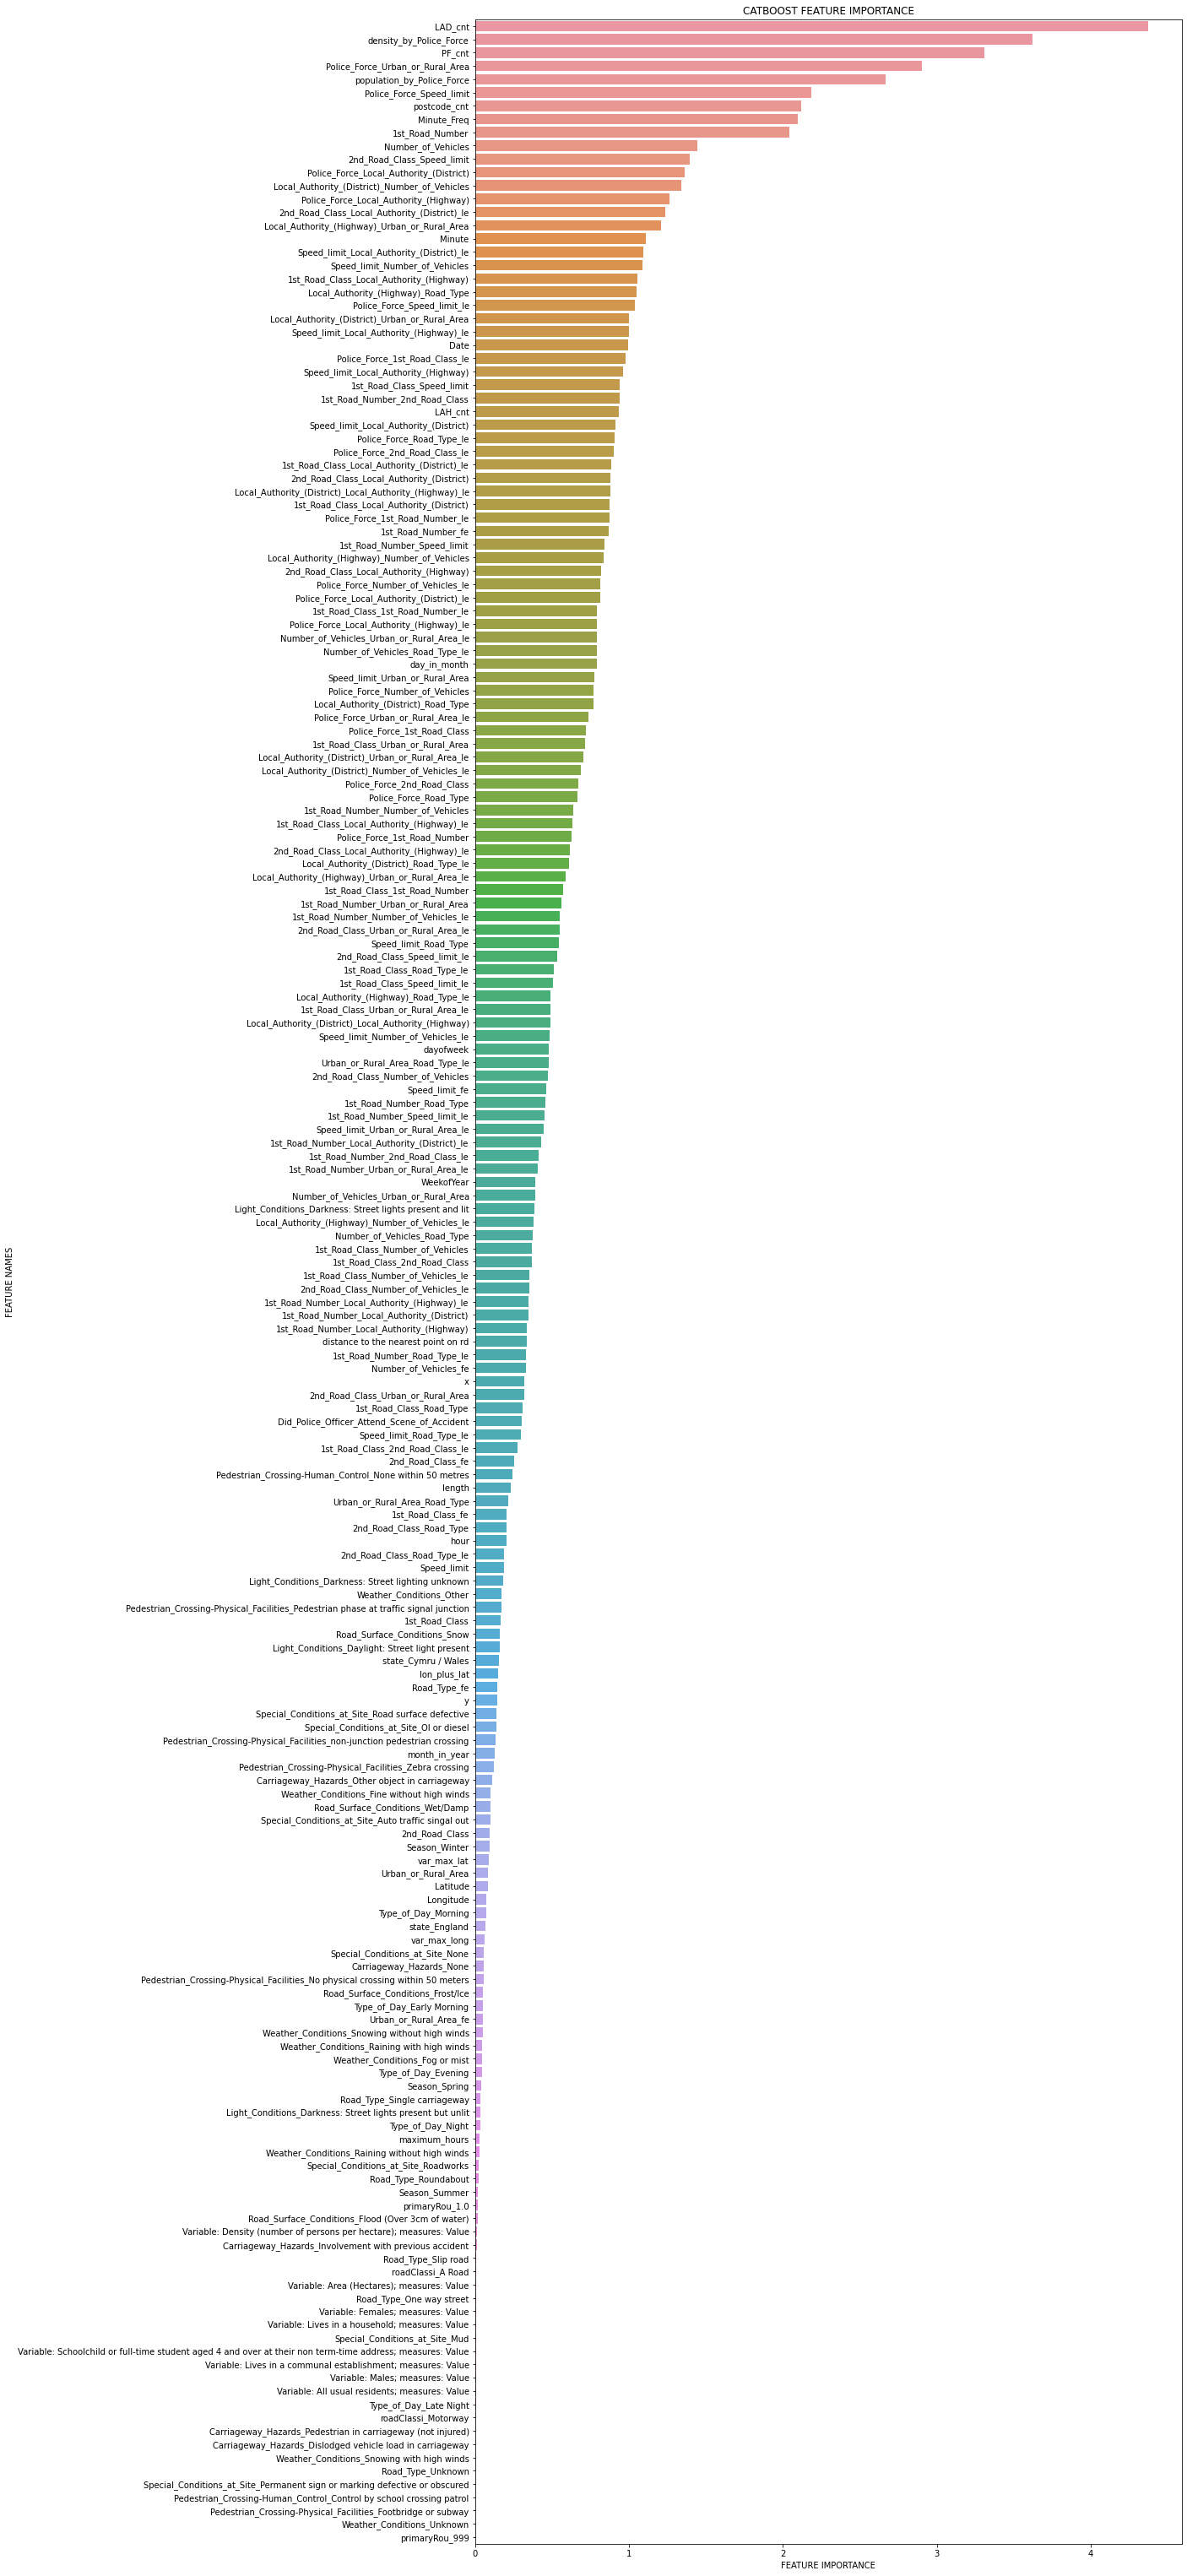

In [69]:

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,55))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(model.get_feature_importance(),x_train.columns,'CATBOOST')

In [70]:
#Submit prediction
df1=pd.read_csv('test.csv')

df1["casualities"]=test_preds

Accident_risk_index=df1.groupby("postcode").casualities.sum()/df1.groupby("postcode").Accident_ID.count()

postcode=list(df1.groupby("postcode").postcode.count().index)

sub_final_df=pd.DataFrame({"postcode":postcode,"Accident_risk_index":Accident_risk_index})
sub_final_df.to_csv("cb_new_divide_by_ft_pluslat_lon_reduced.csv",index=False)
sub_final_df.shape,sub_final_df.head(10)

((49772, 2),
           postcode  Accident_risk_index
 postcode                               
 AB10 1AU  AB10 1AU             1.344906
 AB10 1PG  AB10 1PG             1.357971
 AB10 1TT  AB10 1TT             1.477456
 AB10 1YP  AB10 1YP             1.388434
 AB10 6LQ  AB10 6LQ             1.344694
 AB10 6NN  AB10 6NN             1.553909
 AB10 7FT  AB10 7FT             1.452170
 AB10 7JP  AB10 7JP             1.238208
 AB10 7LY  AB10 7LY             1.210661
 AB11 5BD  AB11 5BD             1.320834)